In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import datetime
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
import datetime
from binance.client import Client

# from config import *
from toc import *
client = Client(t_key, t_secret)

In [1]:
def poly_ys(serie):
    x_axis = [i for i in range(len(serie))]
    models = []
    for i in range(2, 4):
        mymodel = np.poly1d(np.polyfit(x_axis, serie, i))
        models.append(mymodel)
    myline = np.linspace(1, len(serie), len(serie))
    y_s = []
#     data_max = argrelextrema(y, np.greater)[0]
#     data_min = argrelextrema(y, np.less)[0]
    for model in models:
        y_y = model(myline)
        y_s.append(y_y)
    return y_s

In [2]:
def d_xy(S, tipo):
    f = Fitter(S, distributions=[tipo])
    f.fit()
    dd = f.summary(Nbest=15).loc[tipo]['sumsquare_error']
    plt.close()
    return dd

In [3]:
def get_colio(serie):
    ys = poly_ys(serie)
    V = [serie]+ys
    corrs = []
    for v in range(len(V)):
        mini = []
        for w in range(len(V)):
            v_v = V[v]
            w_w = V[w]
            corr, _ = pearsonr(v_v, w_w)
            mini.append(corr)
        corrs.append(mini)
    arr_c = np.array(corrs)
    arr_c = arr_c[arr_c<0.9999999999999]

    dx = d_xy(serie, 'triang')
    dy = d_xy(ys[0], 'uniform')
    var = np.array([dx, dy]).std()
    
    me = ys[0]
    n = len(me)//2
    first, last = me[0], me[-1]
    middle = me[n]
    gansta = ''
    if middle>first or middle>last:
        gansta = 'up'
    else:
        gansta = 'down'
    
    U = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy, var, gansta #1 yes |3
    return U

In [148]:
def operative_decision(Z):
    maxi, mini, stdg, mixstd, leemis_x, leemis_y, gansta_var, eye = get_colio(Z)
    cs = .995, .8099, .07,   .1,     .00099999
    cs = .915, .723,  .0871, .10007, .00041661, .00078376, .00022995
    c1 = maxi>cs[0]
    c2 = mini>cs[1]
    c3 = stdg<cs[2]
    c4 = mixstd<cs[3]
    c5 = leemis_x<cs[4]
    c6 = leemis_y<cs[5]
    c7 = gansta_var<cs[6]
    stts = [maxi, mini, stdg, mixstd, leemis_x, leemis_y, gansta_var]
    decs = [c1, c2, c3, c4, c5, c6, c7]
    return stts, decs, eye # 15m \|/ 25 - 74

In [26]:
date = datetime.datetime.now() - timedelta(days=0)
date = date.strftime("%Y-%m-%d 00:00:00")
date

'2021-09-15 00:00:00'

577


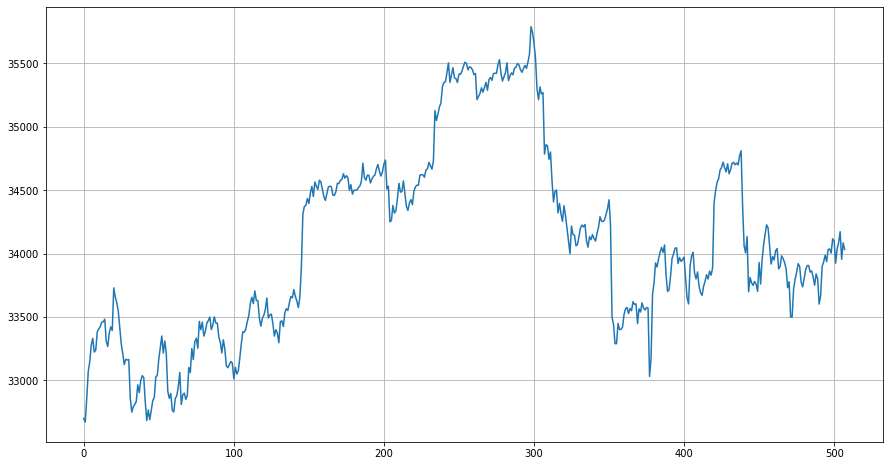

In [202]:
L3m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_15MINUTE,
                      # start_str=date,
                      start_str='2021-07-01 02:00:00',
                      end_str='2021-07-07 02:00:00',
                      # start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      #limit=1500
                                      )
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
M3 = arr[:, 3][69:]
fig = plt.figure(figsize=(15, 8))
plt.plot(M3)
# plt.plot(M3, "x", c='b')
plt.grid()
plt.show()

33070.35 33126.0 0.16799492845499445 [True, False, False, False, False, False, False] 0.14285714285714285 up
33147.33 33166.52 0.05785955234373414 [True, False, False, False, False, False, False] 0.14285714285714285 up
33278.1 33161.46 0.35173360883386745 [True, False, False, False, False, False, False] 0.14285714285714285 up
33212.38 33167.5 0.13531318308584422 [True, False, False, False, False, False, False] 0.14285714285714285 down
33126.0 33256.67 0.39291366213153106 [True, False, False, False, False, False, False] 0.14285714285714285 down
33161.46 33215.61 0.1630257580697794 [True, True, False, False, False, False, True] 0.42857142857142855 down
33165.0 33310.63 0.43718776858917824 [True, True, False, False, False, False, False] 0.2857142857142857 down
32793.3 32859.0 0.19994522048752877 [False, False, False, False, False, False, False] 0.0 up
32810.0 32896.58 0.2631884530246054 [False, False, True, True, False, False, False] 0.2857142857142857 up
32833.84 32764.55 0.2114785644850

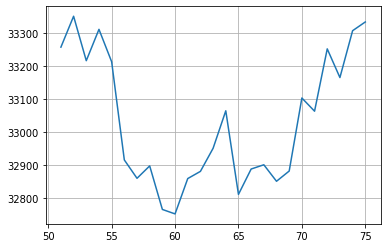

33350.36 33254.01 0.28973949307165825 [True, True, True, True, False, False, True] 0.7142857142857143 down


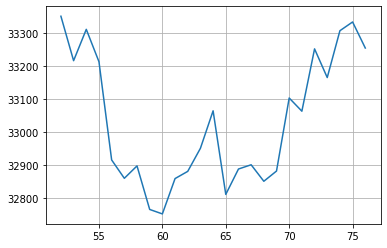

33310.63 33400.0 0.26757485029940903 [True, True, True, True, False, True, True] 0.8571428571428571 down


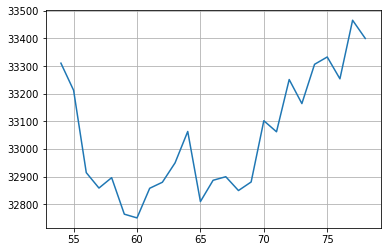

33102.47 33250.0 0.4436992481202972 [True, True, True, True, False, False, False] 0.5714285714285714 up


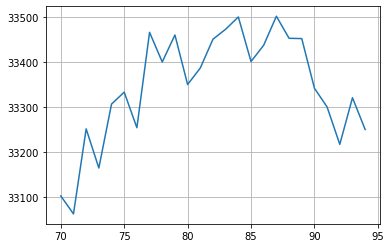

33062.48 33116.08 0.1618549055322929 [True, True, True, True, False, False, False] 0.5714285714285714 up


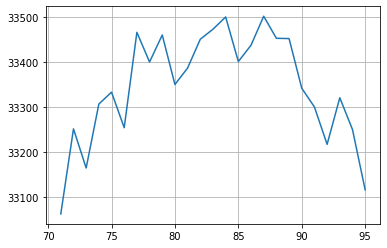

33251.42 33100.0 0.4574622356495415 [True, True, True, True, False, False, False] 0.5714285714285714 up


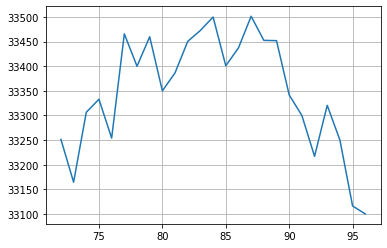

33164.47 33126.02 0.11607189755969587 [True, True, True, True, False, False, True] 0.7142857142857143 up


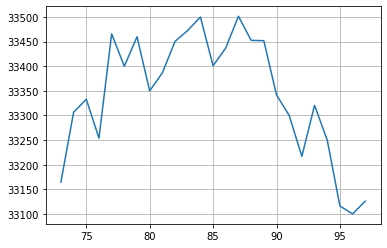

33306.49 33150.0 0.47206636500753535 [True, True, True, True, False, False, False] 0.5714285714285714 up


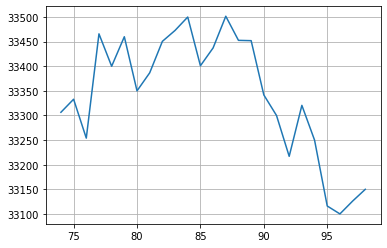

33386.64 33290.0 0.29029738660258164 [True, True, True, True, False, False, True] 0.7142857142857143 up


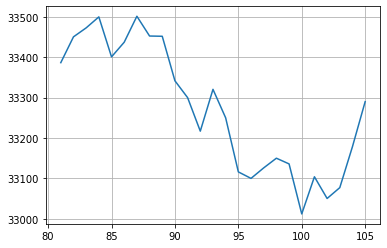

33450.59 33384.04 0.19934675371823074 [True, True, True, True, False, False, False] 0.5714285714285714 down


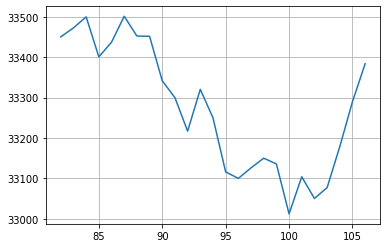

33472.82 33380.54 0.2764484936432989 [False, True, True, True, False, False, False] 0.42857142857142855 down
33500.05 33406.56 0.2798552140657561 [True, True, True, True, False, False, False] 0.5714285714285714 down


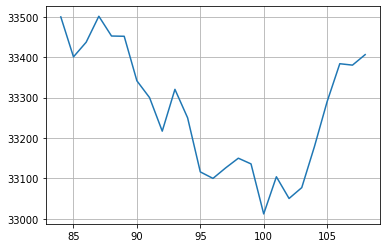

33401.0 33465.0 0.1912445838936202 [True, True, True, True, False, False, False] 0.5714285714285714 down


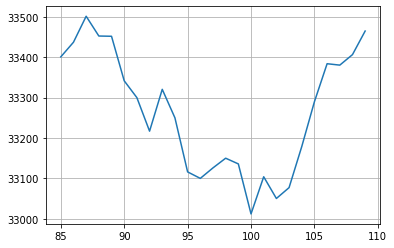

33437.27 33513.0 0.22597201086146632 [True, True, True, True, False, False, True] 0.7142857142857143 down


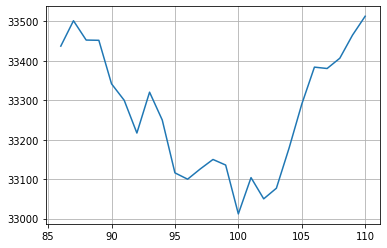

33501.63 33607.79 0.31587914587660626 [True, True, True, True, False, False, True] 0.7142857142857143 down


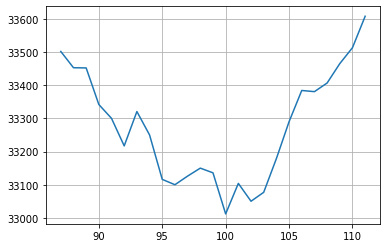

33452.01 33606.0 0.4582217461167588 [True, True, True, True, False, False, True] 0.7142857142857143 down


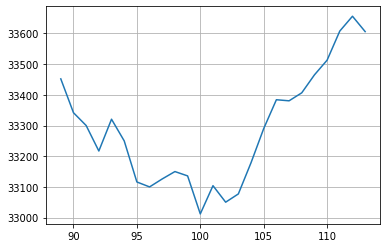

33290.0 33374.59 0.25345629714101814 [True, True, False, False, False, False, False] 0.2857142857142857 up
33384.04 33296.98 0.2614651538968329 [True, True, False, False, False, False, False] 0.2857142857142857 up
33380.54 33464.07 0.2496110006941739 [False, False, True, False, False, False, False] 0.14285714285714285 up
33406.56 33470.0 0.18954287421572252 [False, False, True, True, False, False, False] 0.2857142857142857 up
33465.0 33425.84 0.11715487179979171 [False, False, True, True, False, False, False] 0.2857142857142857 up
33513.0 33533.43 0.060924277653673635 [False, False, True, True, False, False, False] 0.2857142857142857 up
33607.79 33565.0 0.12748398629525065 [False, False, True, True, False, False, False] 0.2857142857142857 down
33656.09 33552.32 0.30927816615958836 [True, False, False, False, False, False, False] 0.14285714285714285 down
33606.0 33611.86 0.01743432228981253 [True, False, False, False, False, False, False] 0.14285714285714285 down
33706.23 33661.12 0.134

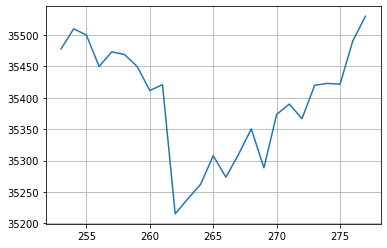

35510.0 35420.67 0.2521973751484705 [True, True, False, False, False, False, False] 0.2857142857142857 down
35500.0 35362.02 0.39019264170995666 [False, False, True, True, False, False, False] 0.2857142857142857 down
35450.0 35395.51 0.15394607960161602 [False, False, True, True, False, False, False] 0.2857142857142857 down
35473.26 35427.01 0.13055010851889562 [False, False, False, False, False, False, False] 0.0 down
35469.0 35505.07 0.10159112487315111 [False, False, True, True, False, False, False] 0.2857142857142857 down
35450.0 35365.0 0.24035062915311747 [False, False, False, False, False, False, False] 0.0 up
35411.61 35402.56 0.025563123118788333 [False, False, True, True, False, False, False] 0.2857142857142857 up
35421.0 35425.71 0.013295428659013828 [False, False, True, True, False, False, False] 0.2857142857142857 up
35310.01 35450.23 0.39554045206477123 [False, False, True, True, False, False, False] 0.2857142857142857 up
35350.46 35430.27 0.22525936155721554 [False, Fals

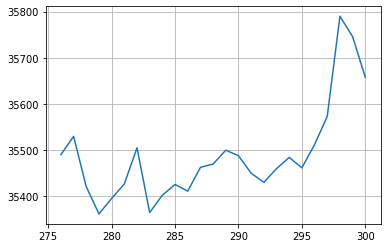

35530.0 35544.0 0.039387801035336484 [True, True, False, False, False, False, False] 0.2857142857142857 up
35420.67 35304.07 0.33027353503434176 [False, False, False, False, False, False, False] 0.0 up
35362.02 35214.86 0.4178917650105558 [False, False, False, False, False, False, False] 0.0 up
35395.51 35315.45 0.22669964562253903 [False, False, False, False, False, False, False] 0.0 up
35427.01 35258.74 0.4772433728488428 [False, False, False, False, False, False, False] 0.0 up
34312.8 34160.19 0.4467481006399572 [False, False, False, False, False, False, False] 0.0 down
34255.0 34207.87 0.13777531310776547 [False, False, False, False, False, False, False] 0.0 down
34378.36 34291.25 0.25402981810228725 [True, False, False, False, False, False, False] 0.14285714285714285 down
34300.0 34256.0 0.12844465203176086 [True, False, False, False, False, False, False] 0.14285714285714285 down
34199.02 34253.0 0.15759203573410563 [False, False, False, False, False, False, False] 0.0 down
34095.

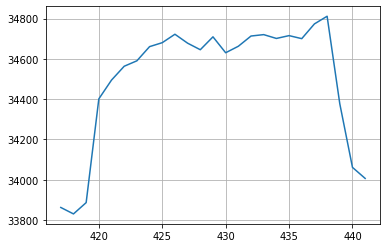

34060.99 33900.0 0.47489675516223584 [False, False, False, False, False, False, False] 0.0 up
34006.18 33982.78 0.06885840416823301 [False, False, False, False, False, False, False] 0.0 up
33812.07 33880.17 0.2010025333402948 [True, False, False, False, False, False, False] 0.14285714285714285 up
33770.0 33732.0 0.11265267401873592 [True, False, False, False, False, False, False] 0.14285714285714285 up
33750.0 33778.3 0.08378159942922796 [True, False, False, False, False, False, False] 0.14285714285714285 up
33702.7 33724.23 0.06384133900167953 [True, True, True, True, False, False, True] 0.7142857142857143 up


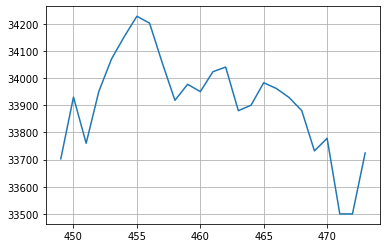

33930.0 33800.0 0.38461538461538464 [True, True, True, True, False, False, False] 0.5714285714285714 up


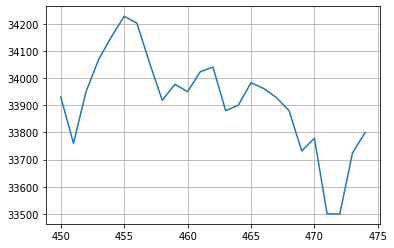

33760.0 33852.67 0.27374502513390603 [False, False, True, True, False, False, False] 0.2857142857142857 up
33951.0 33920.64 0.08950302824475181 [False, True, True, True, False, False, False] 0.42857142857142855 up
34070.3 33901.0 0.49939529807381167 [False, True, True, True, False, False, False] 0.42857142857142855 up
33918.04 33906.0 0.03550993924379423 [False, False, False, False, False, False, False] 0.0 down
33977.04 33906.58 0.2078062724108392 [True, False, False, False, False, False, False] 0.14285714285714285 down
33950.0 33855.0 0.2806084773297888 [True, False, False, False, False, False, False] 0.14285714285714285 down
34023.37 33864.0 0.47061776517836823 [True, False, False, False, False, False, False] 0.14285714285714285 down
33880.0 33751.0 0.38221089745489023 [False, False, True, True, False, False, False] 0.2857142857142857 down
33900.0 33840.62 0.17546959837023487 [False, False, False, False, False, False, False] 0.0 down
33880.17 33900.81 0.06088350101369088 [False, Fal

In [225]:
long = 25
ooc = 25
prc = []
indices = []
precios = []
fig = plt.figure(figsize=(12, 4))
for i in range(len(M3)-long):
    # print(i, end="|")
    # arr = M3[:]
    nn = i+long
    series = M3[i:nn]
    first = series[0]
    last = series[-1]
    # print(series)
    diff = 100*abs((first-last)/last)
    # print(first, last, diff)
    # if diff<=0.6:
    if diff<=0.5:
        _, yup, updo = operative_decision(series)
        avg = np.mean(yup)
        if avg>=0.5:
            print(first, last, diff, yup, avg, updo)
            plt.plot(list(range(i, nn)), series)
            plt.grid()
            plt.show()
            indices+=[i, nn]
            precios+=[first, last]
            prc.append(diff)
        else:
            print(first, last, diff, yup, avg, updo)
            # print(yup)
            pass
    # print(series.shape[0], end="|")
# plt.grid()
# plt.show()

In [231]:
# len(indices)
prc.sort()

In [232]:
prc

[0.06384133900167953,
 0.11607189755969587,
 0.1463551927948213,
 0.1618549055322929,
 0.1912445838936202,
 0.19934675371823074,
 0.22597201086146632,
 0.22899228992290446,
 0.26757485029940903,
 0.2798552140657561,
 0.28973949307165825,
 0.29029738660258164,
 0.31587914587660626,
 0.38461538461538464,
 0.4239817586097594,
 0.4436992481202972,
 0.4574622356495415,
 0.4582217461167588,
 0.469546766639212,
 0.47206636500753535]

In [230]:
np.array(prc).max(), np.array(prc).min(), np.array(prc).std()

(0.47206636500753535, 0.06384133900167953, 0.12597627556819133)

In [227]:
np.array(prc).std()

0.12597627556819133

In [224]:
p = np.array(precios).reshape(-1, 2)
p.var(axis=1).reshape(-1, 1).astype(np.str)

array([['1984.7024999999353'],
       ['2102.2224999998666'],
       ['2719.622499999772'],
       ['5791.209999999778'],
       ['124.32249999995133'],
       ['5685.160000000219'],
       ['268.9600000000477'],
       ['5806.4400000001115'],
       ['2185.5625'],
       ['849.7225000000849'],
       ['2318.42250000014'],
       ['1049.7600000000944'],
       ['1447.8024999999448'],
       ['3192.25'],
       ['5677.62249999978'],
       ['6528.639999999883'],
       ['5483.402499999893'],
       ['2916.0'],
       ['3.4225000000080765'],
       ['5220.0625']], dtype='<U32')

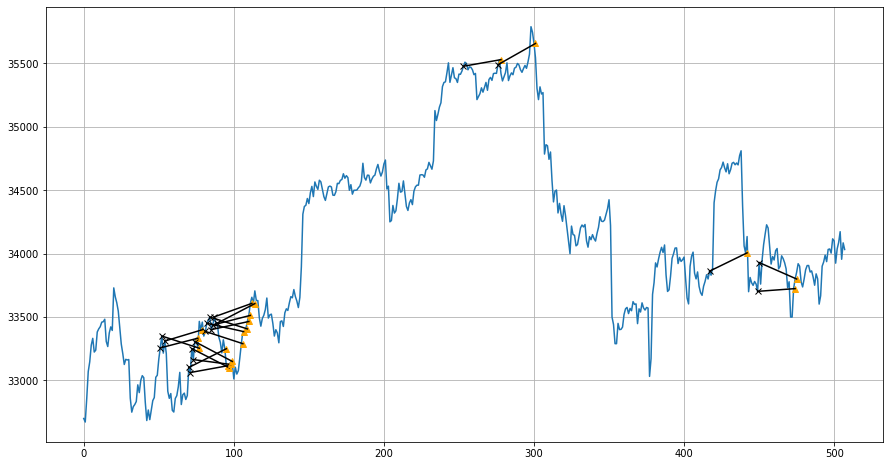

In [244]:
fig = plt.figure(figsize=(15, 8))
plt.plot(M3[:])
# for i in range(0, len(indices), 2):
for i in range(0, len(indices), 2):
    # plt.plot(indices[i+1], precios[i+1], "o")
    plt.plot(indices[i], precios[i], "x", c='k')
    plt.plot(indices[i+1], precios[i+1], "^", c='orange')
    plt.plot([indices[i], indices[i+1]], [precios[i], precios[i+1]], c='k')
    # plt.plot(, , c='r')
# plt.plot(M3, "x", c='b')
plt.grid()
plt.show()

In [80]:
%%timeit
depth = client.futures_coin_order_book(symbol='BTCUSD_PERP', pair="BTCUSDT")

The slowest run took 8.75 times longer than the fastest. This could mean that an intermediate result is being cached.
2.16 s ± 2.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%%timeit
client.futures_coin_mark_price(symbol='BTCUSD_PERP')

906 ms ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
price[0]['']

{'symbol': 'BTCUSD_PERP',
 'pair': 'BTCUSD',
 'markPrice': '47608.99895653',
 'indexPrice': '47607.79454545',
 'estimatedSettlePrice': '47452.41847511',
 'lastFundingRate': '0.00010000',
 'interestRate': '0.00010000',
 'nextFundingTime': 1631836800000,
 'time': 1631829514002}

In [105]:
import time
time.sleep(1)

In [ ]:
while True:
    # price = client.futures_ticker(symbol='BTCUSDT')['lastPrice']
    try:
        price = "$$$$"
        depth = client.futures_coin_order_book(symbol='BTCUSD_PERP', pair="BTCUSDT")
        # price = client.futures_coin_mark_price(symbol='BTCUSD_PERP')
        depth_book(depth, price)
    except:
        #print(".", end=" ")
        time.sleep(10)

In [100]:
# %%timeit
client.futures_ticker(symbol='BTCUSDT')

{'symbol': 'BTCUSDT',
 'priceChange': '-374.41',
 'priceChangePercent': '-0.779',
 'weightedAvgPrice': '47836.95',
 'lastPrice': '47676.15',
 'lastQty': '0.001',
 'openPrice': '48050.56',
 'highPrice': '48488.00',
 'lowPrice': '47038.21',
 'volume': '264252.598',
 'quoteVolume': '12641039038.69',
 'openTime': 1631743920000,
 'closeTime': 1631830328392,
 'firstId': 1442580518,
 'lastId': 1445232162,
 'count': 2651518}

In [96]:
client.futures_coin_mark_price(symbol='BTCUSD_PERP')

[{'symbol': 'BTCUSD_PERP',
  'pair': 'BTCUSD',
  'markPrice': '47667.13901061',
  'indexPrice': '47666.93755556',
  'estimatedSettlePrice': '47693.34088035',
  'lastFundingRate': '0.00010000',
  'interestRate': '0.00010000',
  'nextFundingTime': 1631836800000,
  'time': 1631829950009}]

In [43]:
depth = client.futures_coin_order_book(symbol='BTCUSD_PERP', pair="BTCUSDT")
depth

{'lastUpdateId': 210947207390,
 'E': 1631826771349,
 'T': 1631826771344,
 'symbol': 'BTCUSD_PERP',
 'pair': 'BTCUSD',
 'bids': [['47289.5', '7620'],
  ['47289.4', '1'],
  ['47289.3', '109'],
  ['47288.7', '263'],
  ['47288.6', '1'],
  ['47288.4', '263'],
  ['47288.3', '1'],
  ['47288.1', '263'],
  ['47287.9', '2'],
  ['47286.6', '198'],
  ['47286.5', '180'],
  ['47286.0', '40'],
  ['47285.9', '2'],
  ['47285.8', '82'],
  ['47285.7', '2'],
  ['47285.6', '110'],
  ['47285.5', '160'],
  ['47285.3', '10'],
  ['47285.2', '664'],
  ['47285.1', '603'],
  ['47285.0', '40'],
  ['47284.7', '70'],
  ['47284.3', '440'],
  ['47284.2', '150'],
  ['47283.7', '16'],
  ['47283.5', '100'],
  ['47283.4', '1111'],
  ['47283.1', '2'],
  ['47282.7', '40'],
  ['47282.1', '1'],
  ['47282.0', '500'],
  ['47281.2', '391'],
  ['47281.1', '2'],
  ['47280.8', '165'],
  ['47280.6', '16'],
  ['47280.5', '50'],
  ['47280.3', '1'],
  ['47280.0', '99'],
  ['47279.7', '20'],
  ['47279.4', '40'],
  ['47279.3', '66'],
  [

In [44]:
price = 47328.6

In [35]:
ob.keys()

dict_keys(['lastUpdateId', 'E', 'T', 'symbol', 'pair', 'bids', 'asks'])

In [95]:
L15m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_15MINUTE,
                      # start_str=date,
                      start_str='2021-09-16 02:00:00',
                      # end_str='2021-07-07 02:00:00',
                                )
L15m

[[1631757600000,
  '47968.61',
  '48092.72',
  '47866.00',
  '48068.98',
  '2306.334',
  1631758499999,
  '110666601.52528',
  20700,
  '1417.395',
  '68027026.14709',
  '0'],
 [1631758500000,
  '48068.98',
  '48068.98',
  '47966.00',
  '47969.83',
  '818.856',
  1631759399999,
  '39315161.30359',
  11548,
  '229.992',
  '11042778.68119',
  '0'],
 [1631759400000,
  '47969.83',
  '47980.00',
  '47713.55',
  '47854.12',
  '3174.183',
  1631760299999,
  '151899715.89195',
  28141,
  '1135.743',
  '54368554.44147',
  '0'],
 [1631760300000,
  '47854.03',
  '47974.32',
  '47830.19',
  '47915.69',
  '1401.255',
  1631761199999,
  '67136963.47434',
  15848,
  '755.751',
  '36211554.65729',
  '0'],
 [1631761200000,
  '47915.69',
  '47938.57',
  '47753.27',
  '47771.85',
  '1527.420',
  1631762099999,
  '73076254.16286',
  17672,
  '622.131',
  '29765660.70410',
  '0'],
 [1631762100000,
  '47771.85',
  '47777.57',
  '47330.00',
  '47428.99',
  '10676.117',
  1631762999999,
  '507262475.71097',
 

In [93]:
L15m[-1][4]

'47693.05'

In [91]:
# datetime.datetime.fromtimestamp(1631829600000/1e3).strftime("%Y-%m-%d %H:%M:%S")

In [83]:
def depth_book(depth, price):
    bid = np.array(depth['bids']).astype(np.float64)
    bid_sum = bid.sum(axis=0) # t_value | orders

    ask = np.array(depth['asks']).astype(np.float64)
    ask_sum = ask.sum(axis=0) # t_value | orders
    
    # bid ask price histograms
    bid_hist = np.histogram(bid[:, 0])
    ask_hist = np.histogram(ask[:, 0])
    
    # total volumen
    vol_bid = bid_sum[0]*bid_sum[1]
    vol_ask = ask_sum[0]*ask_sum[1]
    vol_total = vol_bid+vol_ask # total vol
    diff_vol = vol_bid-vol_ask # direction
    
    # porcentaje representativo
    p_bid = (vol_bid/vol_total)*100
    p_ask = (vol_ask/vol_total)*100
    p_dif = (abs(diff_vol)/vol_total)*100
    
    # avg prices
    avg_bid = round(bid_hist[-1].mean(), 3)
    avg_ask = round(ask_hist[-1].mean(), 3)
    
    # std prices
    std_price_orders_bid = np.std(bid_hist[-1])
    std_price_orders_ask = np.std(ask_hist[-1])
    
    # std num orders
    std_order_bid = np.std(bid_hist[0])
    std_order_ask = np.std(ask_hist[0])
    
    # str %
    p_bid_str = "{:.3f}".format(p_bid)
    p_ask_str = "{:.3f}".format(p_ask)
    p_dif_str = "{:.3f}".format(p_dif)
    
    fig = plt.figure(figsize=(12, 5))
    plt.title(f"price: ${round(float(price), 2)}")
    plt.hist(bid[:, 0], color='green')
    plt.hist(ask[:, 0], color='red')
    plt.legend([f'bid = {avg_bid}; {p_bid_str}% std_bid = {round(std_order_bid, 3)}', 
                f'ask = {avg_ask}; {p_ask_str}% std_ask = {round(std_order_ask, 3)}'])
    plt.grid()
    plt.show()

In [72]:
bid_hist

(array([ 33,  25,  23,  27,  33,  50,  56,  67,  84, 102], dtype=int64),
 array([47002.8 , 47031.47, 47060.14, 47088.81, 47117.48, 47146.15,
        47174.82, 47203.49, 47232.16, 47260.83, 47289.5 ]))

In [63]:
ask = np.array(depth['asks']).astype(np.float64)
ask_sum = ask.sum(axis=0) # t_value | orders
# ask_sum
ask

array([[4.72896e+04, 5.41400e+03],
       [4.72901e+04, 2.00000e+00],
       [4.72907e+04, 6.25000e+02],
       [4.72917e+04, 2.36000e+02],
       [4.72936e+04, 1.44000e+02],
       [4.72943e+04, 1.20000e+01],
       [4.72947e+04, 1.10000e+02],
       [4.72948e+04, 1.00000e+00],
       [4.72953e+04, 2.00000e+00],
       [4.72956e+04, 1.07300e+03],
       [4.72957e+04, 2.51000e+02],
       [4.72958e+04, 2.00000e+01],
       [4.72959e+04, 4.00000e+01],
       [4.72968e+04, 1.89000e+02],
       [4.72973e+04, 2.00000e+00],
       [4.72975e+04, 5.00000e+00],
       [4.72976e+04, 2.13000e+02],
       [4.72992e+04, 4.00000e+01],
       [4.72994e+04, 2.00000e+02],
       [4.72995e+04, 8.46000e+02],
       [4.72997e+04, 1.42000e+02],
       [4.72998e+04, 2.00000e+00],
       [4.72999e+04, 1.66000e+02],
       [4.73000e+04, 1.50000e+02],
       [4.73001e+04, 3.00000e+00],
       [4.73004e+04, 1.00000e+01],
       [4.73009e+04, 4.50000e+01],
       [4.73014e+04, 2.00000e+01],
       [4.73018e+04,

In [60]:
bid[:, 1].astype(np.int)

array([ 7620,     1,   109,   263,     1,   263,     1,   263,     2,
         198,   180,    40,     2,    82,     2,   110,   160,    10,
         664,   603,    40,    70,   440,   150,    16,   100,  1111,
           2,    40,     1,   500,   391,     2,   165,    16,    50,
           1,    99,    20,    40,    66,     9,   150,     7,   599,
        1192,    95,  1948,     1,    50,   968,     2,    42,   700,
        1324,   102,   297,   120,   411,    50,   767,   123,   168,
          66,    25,    69,    40,   151,    42,    21,   189,    40,
           2,     2,   189,  4199,    40,    40,    44,     2,    20,
           1,   297,   150,    69,    40,  1287,   839,     1,   300,
           1,    40,    93,    44,     2,   878,    40,    10,   440,
           2,  1297,   193,  1476,   100,   232,   951,   500,  1816,
           2,   500,   120,    12,     2,   109,     1,    40,    45,
          23,   111,   108,   100,   100,   861,    40,     5,     2,
          12,   643,

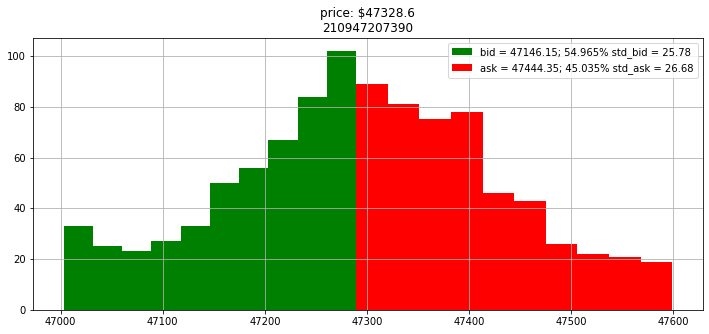

In [47]:
# depth = clientreal.get_order_book(symbol='BTCUSDT')
# price = clientreal.futures_mark_price(symbol='BTCUSDT')['markPrice']
# depth
# clientreal.get_order_book?
bid = np.array(depth['bids']).astype(np.float64)
bid_sum = bid.sum(axis=0)
# bid
# bid_sum
ask = np.array(depth['asks']).astype(np.float64)
ask_sum = ask.sum(axis=0)
# ask
# ask_sum

vol_bid = bid_sum[0]*bid_sum[1]
vol_ask = ask_sum[0]*ask_sum[1]
vol_total = vol_bid+vol_ask

p_bid = (vol_bid/vol_total)*100
p_ask = (vol_ask/vol_total)*100
p_bid_str = "{:.3f}".format(p_bid)
p_ask_str = "{:.3f}".format(p_ask)

bid_hist = np.histogram(bid[:, 0])
ask_hist = np.histogram(ask[:, 0])

avg_bid = round(np.histogram(bid[:, 0])[-1].mean(), 3)
avg_ask = round(np.histogram(ask[:, 0])[-1].mean(), 3)

std_price_bid, std_orders_bid = np.std(bid_hist[-1]), np.std(bid_hist[0])
std_price_ask, std_orders_ask = np.std(ask_hist[-1]), np.std(ask_hist[0])

# tupla = p_bid_str, p_ask_str, std_orders_bid, std_orders_ask
# Y.append(tupla)
# with open(f'data_{m}.json', 'w') as f:
#     json.dump(Y, f)

fig = plt.figure(figsize=(12, 5))
plt.title(f"price: ${round(float(price), 2)}\n{depth['lastUpdateId']}")
plt.hist(bid[:, 0], color='green')
plt.hist(ask[:, 0], color='red')
plt.legend([f'bid = {avg_bid}; {p_bid_str}% std_bid = {round(std_orders_bid, 3)}', 
            f'ask = {avg_ask}; {p_ask_str}% std_ask = {round(std_orders_ask, 3)}'])
plt.grid()
plt.show()

In [48]:
tupla

('54.965', '45.035', 25.779837082495305, 26.679580206592455)

In [52]:
bid_hist[-1]

array([47002.8 , 47031.47, 47060.14, 47088.81, 47117.48, 47146.15,
       47174.82, 47203.49, 47232.16, 47260.83, 47289.5 ])

In [54]:
 np.std(bid_hist[-1]), np.std(bid_hist[0])

(90.66250051702694, 25.779837082495305)

In [30]:
client.futures_coin_orderbook_ticker(symbol='BTCUSD_PERP')

[{'symbol': 'BTCUSD_PERP',
  'pair': 'BTCUSD',
  'bidPrice': '47136.2',
  'bidQty': '8969',
  'askPrice': '47136.3',
  'askQty': '1',
  'time': 1631825982039}]

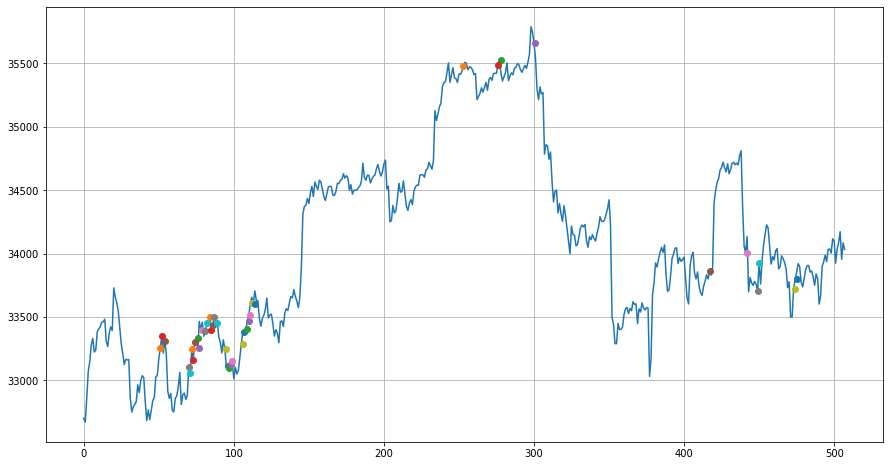

In [198]:
fig = plt.figure(figsize=(15, 8))
plt.plot(M3[:])
# for i in range(0, len(indices), 2):
for i in range(len(indices)):
    # plt.plot(indices[i+1], precios[i+1], "o")
    plt.plot(indices[i], precios[i], "o")
# plt.plot(M3, "x", c='b')
plt.grid()
plt.show()

In [145]:
operative_decision(series)

([0.9483707532730921,
  0.8766135869045623,
  0.030495939250307656,
  0.0358785831842649,
  736148065.6544322,
  2445436073.0269656,
  854644003.6862668],
 0.5714285714285714,
 'up')

In [194]:
client.futures_historical_klines?

In [195]:
client.get_order_book?

In [28]:
L3m[-1]

[1631753100000,
 '47881.32',
 '47933.19',
 '47872.47',
 '47885.13',
 '385.985',
 1631753999999,
 '18489442.09307',
 4809,
 '217.828',
 '10433940.06661',
 '0']

In [33]:
datetime.datetime.fromtimestamp(1631664000000/1e3).strftime("%Y-%m-%d %H:%M:%S")

'2021-09-14 19:00:00'

In [32]:
datetime.datetime.fromtimestamp(1631753100000/1e3).strftime("%Y-%m-%d %H:%M:%S")

'2021-09-15 19:45:00'